# Data analysis with pandas

Technically, I think pandas stands for "**pan**el **da**ta." But really it's just an easy-to-remember name.

Let's use it to explore our Bechdel-test dataset. The questions we'll pose are based on [a parallel analysis by Albert Y. Kim, Chester Ismay, and Jennifer Chunn.](https://mran.microsoft.com/web/packages/fivethirtyeight/vignettes/bechdel.html) Basically, our goal is to figure out whether a film's approach to gender is significantly correlated with the amount of money executives are willing to spend on it, or the amount it makes. It would be especially telling if we could show that executives tend to under-estimate the amount of money made by films about women.

First run the cell below, to make sure all the modules you need are imported, and to load the dataset itself. 

As part of the process, this cell also prints out your "current working directory," (which can be useful if you need to check that the relative path is starting *from* the right place).


In [8]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cwd = os.getcwd()
print('Current working directory: ' + cwd + '\n')
      
relativepath = os.path.join('..', 'data', 'fivethirtyeight', 'bechdel.csv')
bechdel = pd.read_csv(relativepath)


Current working directory: /Users/tunder/Dropbox/courses/2017datasci/03-Pandas



### Initial exploratory analysis.

Once that's done, we can start to explore the basic properties of the DataFrame. Remember that shape is defined as

(rows, columns)

In [12]:
print('Data frame shape: ', bechdel.shape)

Data frame shape:  (1794, 15)


In [13]:
print('Data frame columns: ', bechdel.columns.values)

Data frame columns:  ['year' 'imdb' 'title' 'test' 'clean_test' 'binary' 'budget' 'domgross'
 'intgross' 'code' 'budget_2013' 'domgross_2013' 'intgross_2013'
 'period_code' 'decade_code']


DataFrames have a head() method that can be useful to get a sense of what columns actually contain. Note that you can scroll back and forth below.

In [2]:
bechdel.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013,domgross_2013,intgross_2013,period_code,decade_code
0,2013,tt1711425,21 & Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0


To get a sense of the distribution of a column we already know how to print a histogram.

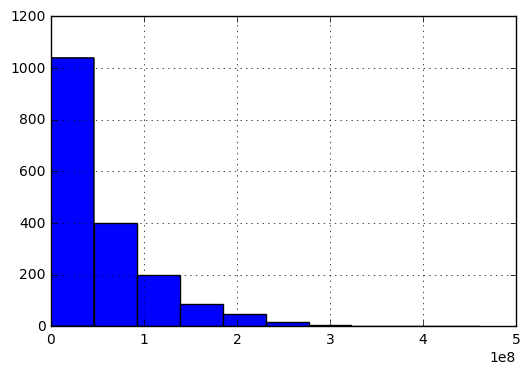

In [18]:
bechdel['budget_2013'].hist()

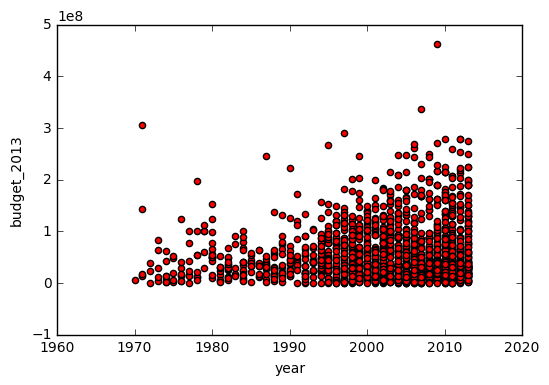

In [31]:
bechdel.plot(kind = 'scatter', x = 'year', y = 'budget_2013', color = 'r', marker = 'o')
plt.show()

## Pandas' relation to numpy

This may seem a little abstract or metaphysical, but it's important to understand that the columns in Pandas are not ordinary Python lists. Pandas is built on top of a library called Numpy, which allows us to do math directly on vectors and matrices instead of individual numbers. Here's a quick illustration of the difference between a Numpy "array" and a Python "list."

In [4]:
# a Python list can contain mixed items
heterogenous = ['alphabet', 1492, ('a', 'tuple')]

# a Numpy array has to have a single data type
np_array = np.array([1, 10, 100, 1000], dtype = 'int64')

# If you try to do arithmetic on Python lists, it will
# be interpreted as concatenation
print('List arithmetic: concatenation')
py_list = [1, 10, 100, 1000]
print(py_list * 2)
py_list + [200]
print()

print('Numpy arithmetic: vector math')
print(np_array + 1)
print(np_array * 2)
print(np_array + np_array/10)
print(np.log10(np_array))
py_list
# In the last two examples here, note that the entire array of
# integers is converted to an array of floats when necessary

List arithmetic: concatenation
[1, 10, 100, 1000, 1, 10, 100, 1000]

Numpy arithmetic: vector math
[   2   11  101 1001]
[   2   20  200 2000]
[    1.1    11.    110.   1100. ]
[ 0.  1.  2.  3.]


[1, 10, 100, 1000]

[A full explanation of Numpy data types](https://www.tutorialspoint.com/numpy/numpy_data_types.htm) gets complicated, but for our purposes the main ones you need to know about are 

    int64 (Python int)
    float64 (Python float)
    and object (Python string)
    
If you needed to save space because of memory limits on big data you could get clever and use another type like ```int16.```

I've said that Pandas columns are built on Numpy arrays, but they do have a few other features — especially a feature called an 'index,' which allows automatic alignment of differently-sorted data. For this reason we'll refer to them as data objects called Series.

In [36]:
# How many bicyclists use different paths in Montreal?

city_path = pd.Series([5, 14, 17, 18, 14, 12, 0], index = ['Su', 'M', "T", 'W', 'R', 'F', 'Sa'])
scenic_path = pd.Series([14, 2, 18], index = ['Su', 'W', 'Sa'])
path_frame = pd.concat([city_path, scenic_path], axis = 1)
path_frame.columns = ['city', 'scenic']
path_frame

,city,scenic
F,12,NaN
M,14,NaN
R,14,NaN
Sa,0,18.0
Su,5,14.0
T,17,NaN
W,18,2.0


Notice several things above: the index is not technically a column of the DataFrame. It's a separate entity, which we could access by saying ```path_frame.index```. The two Series are automatically aligned along the index. Where values are missing in the scenic path, NaN is created as a placeholder for missing data. You can check for missing values with the method ```isnull()``` and fill missing values with the method ```fillna()```. In this case, we could assume that a missing value is equivalent to zero. That assumption won't always be safe, but if it's safe here, we could apply it.

In [38]:
print(path_frame['scenic'].isnull())
path_frame.fillna(0)

F      True
M      True
R      True
Sa    False
Su    False
T      True
W     False
Name: scenic, dtype: bool


,city,scenic
F,12,0.0
M,14,0.0
R,14,0.0
Sa,0,18.0
Su,5,14.0
T,17,0.0
W,18,2.0


You'll notice that the presence of missing data has converted one column to float, while the other remains integer. That's not really intended behavior; it's an odd, relatively trivial side-effect of the choice to represent missing data as NaN.

## Split - apply - combine

A lot of operations on tabular data boil down to a three-step recipe:

1. split the table into subgroups using values of some variable
2. perform an operation on each subgroup
3. recombine the transformed data

For a full explanation of this strategy, [see the Pandas documentation.](http://pandas.pydata.org/pandas-docs/stable/groupby.html) But to take a simple example, suppose we wanted to find the mean budget for each year in our bechdel dataset. The ```groupby``` method divides the DataFrame, producing a data object that is basically a ```mapping```; it's not something you can easily display by itself.


In [9]:
by_year = bechdel.groupby('year')
by_year

If you want to use the GroupBy object, you need to do something with it. ```aggregate()``` is a common operation. It takes a function as its argument. Some of the functions that can be passed in include ```np.sum, np.mean, np.median,``` and ```np.std``` (standard deviation). The prefix ```np``` is there to acknowledge that many of these are actually Numpy functions.


In [10]:
mean_budget = by_year.aggregate(np.mean)[['budget', 'budget_2013']]
mean_budget

,budget,budget_2013
year,,
1970,1000000,5997631
1971,17142587,98647264
1972,3670666,20453466
1973,7195400,37731916
1974,4182857,19758671
1975,5800000,25102981
1976,7525000,30790999
1977,10071428,38705973
1978,15843750,56573373


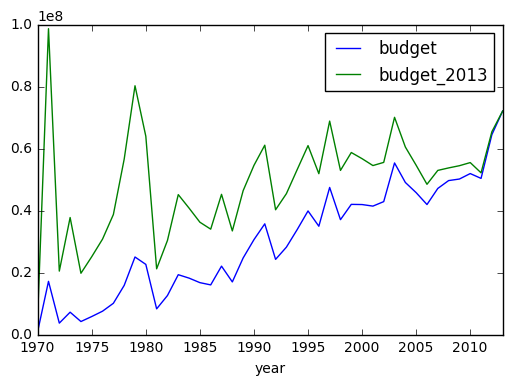

In [63]:
mean_budget.plot()
plt.show()

You can also use the ```.count()``` method if you want simply to count the number of rows in each group. We can use this to count the number of films in each year, for instance.

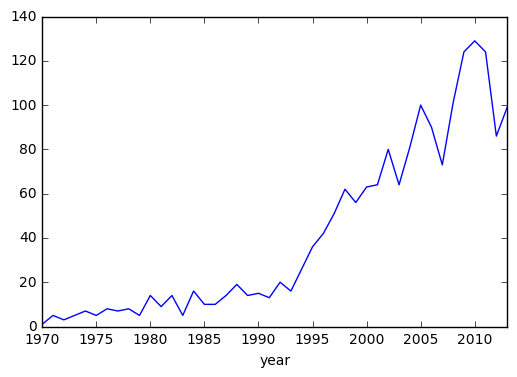

In [62]:
number_of_films = bechdel.groupby('year').count()['title']
number_of_films.plot()
plt.show()

## Exercise 1.

Use the split-apply-combine method outlined above to divide the ```bechdel``` dataframe by the ```binary``` column. Report the mean and median inflation-adjusted budget for films that did or didn't pass the Bechdel test, as well as the sheer number of films in each category.

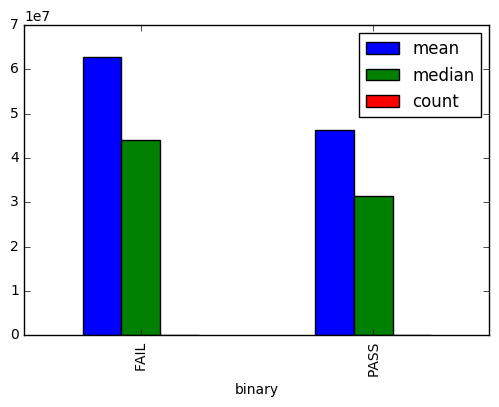

In [33]:
grouped_bechdel = bechdel.groupby('binary')
bmean = grouped_bechdel.aggregate(np.mean)['budget_2013']
bmedian = grouped_bechdel.aggregate(np.median)['budget_2013']
bcount = grouped_bechdel.count()['budget_2013']
all_together = pd.concat([bmean, bmedian, bcount], axis = 1)
all_together.columns = ['mean', 'median', 'count']
all_together
all_together.plot(kind='bar')

## Adding columns to a DataFrame

This is very easy. Add a column just as you would add a key to a dictionary. For instance, if we define return on investment as 

    gross receipts / budget
    
Then

In [42]:
bechdel['domroi'] = bechdel['domgross_2013'] / bechdel['budget_2013']
bechdel.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013,domgross_2013,intgross_2013,period_code,decade_code,introi,domroi
0,2013,tt1711425,21 & Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0,3.245828,1.975568
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0,0.908200,0.298105
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0,7.930352,2.655352
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0,2.172017,1.239549
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0,2.375505,2.375505


You can scroll over to confirm we added two columns. Then if we want to know what the mean return on investment is, we could use split-apply-combine:

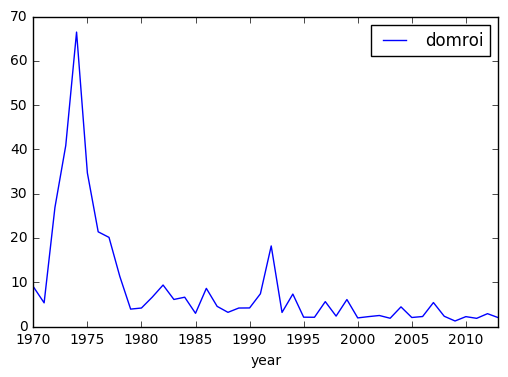

In [43]:
mean_roi = bechdel.groupby('year').aggregate(np.mean)[['domroi']]
mean_roi.plot()

Looks like business is getting tougher. But maybe not. 

## Exercise 2

What if we calculated return on investment using international gross receipts and broke by pass/fail on the bechdel test? Is business still getting tougher?


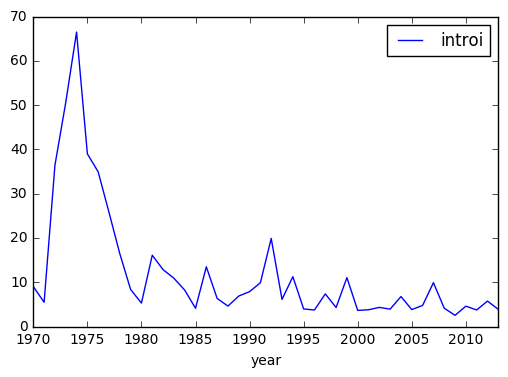

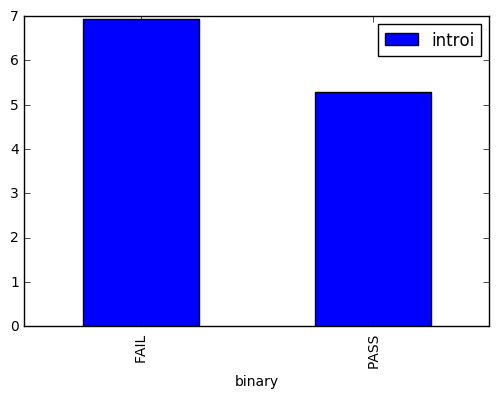

In [47]:
bechdel['introi'] = bechdel['intgross_2013'] / bechdel['budget_2013']
mean_introi_byyr = bechdel.groupby('year').aggregate(np.mean)[['introi']]
mean_introi_byyr.plot()
plt.show()
mean_domrroi_bytest = bechdel.groupby('binary').aggregate(np.mean)[['introi']]
mean_domrroi_bytest.plot(kind = 'bar')

## Relations between variables

To start thinking about the relations between columns, we need to define some *functions*. To make this simple, let's define a toy dataset. Like, literally about toys. Is there a relationship between their price and their weight?

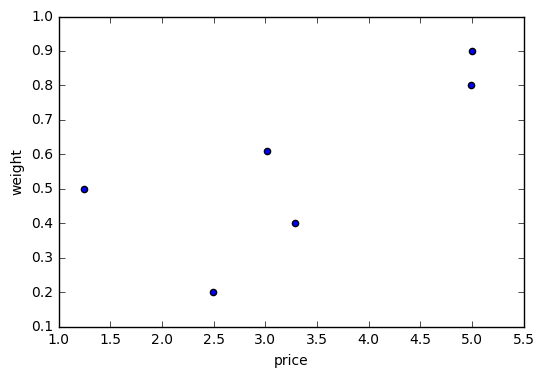

In [58]:
toy = pd.DataFrame({'price': [1.25, 5.00, 4.99, 2.49, 3.29, 3.02],
                  'weight': [.5, .9, .8, .2, .4, .61]})
toy.plot(kind = 'scatter', x = 'price', y= 'weight')

Intuitively, what we want to ask here is, do toys with above-average prices also have above-average weights?

One way to measure this is to measure *covariance*.

In [71]:
covariance = 0
diff_from_price_mean = toy['price'] - np.mean(toy['price'])
diff_from_weight_mean = toy['weight']- np.mean(toy['weight'])

covariance = 0
number_of_toys = len(diff_from_price_mean)

covariance = np.sum(diff_from_price_mean * diff_from_weight_mean)
#for i in range(number_of_toys):
    #covariance += diff_from_price_mean[i] * diff_from_weight_mean[i]
    # if price and weight are both above average, this value will be positive
    # if they are both below average — still positive
    # if one is over and the other is under, negative!
    
covariance = covariance / (number_of_toys - 1)

print(covariance)


0.27676


## Exercise 3.

Play around with the data above to get a sense of how covariance changes when you change values.

Try changing individual points. Then double one whole axis by saying 

    toy['weight'] = toy['weight'] * 2

## Defining functions

As your programs get more complex, you can't afford to be writing out formulas like the covariance formula above each time you need them. Errors will multiply. For instance, what if you need to change something in one place? Will you remember to change it everywhere?

To make code modular, we can define functions, like this:


In [85]:
def dot(vectorA, vectorB):
    ''' Calculates the dot product of two vectors; in other words, the
    sum of the pairwise products of A and B.
    '''
    assert len(vectorA) == len(vectorB)
    # If that's not true, this function should just fail. 
    dotproduct = np.sum(vectorA * vectorB)
        
    return dotproduct
    # this is the value the function will return

print(dot(diff_from_price_mean, diff_from_weight_mean))
print(dot(diff_from_price_mean, diff_from_weight_mean) / 5) 
        

1.3838000000000001
0.27676


Our function worked wonderfully, where its main purpose is concerned. Dividing the dot product by ```number_of_toys - 1``` got us the correct covariance. The only problem is that we also wanted to state spaghetti is delicious, and for some reason this important information has not been retained.

Of course, actually this is a feature of functions, not a bug. You may need to do all kinds of things inside a function, you may use generic variables like ```i``` and ```n```, and you don't necessarily want changes to variables *inside* a function to affect things outside a function. By default, they don't. As a general rule, you have to send things into a function as arguments and get them back through a ```return``` statement.

The important exception to this: mutable data structures passed into a function as arguments *can* be changed inside a function and will remain changed whether or not they are passed back in the return statement.

## Exercise 4: Defining your first function

Now that you know how to define a function, try defining a ```covariance``` function. You can use the ```dot``` function we defined as an element of your covariance function. Then test it by passing in toy['price'] and toy['weight']. It should give you the same result we got for covariance above.

In [86]:
def covariance(vecA, vecB):
    assert len(vecA) == len(vecB)
    n = len(vecA)
    diffA = vecA - np.mean(vecA)
    diffB = vecB - np.mean(vecB)
    cov = dot(diffA, diffB) / (n-1)
    
    return cov
covariance(toy['weight'], toy['price'])

0.27676

## The difference between covariance and correlation.

As you saw above, covariance is not scale-invariant. We'd like a measure of relation that *is* scale-invariant.

A common one is Pearson's correlation coefficient, which is simply

    covariance(X, Y) / (std(X) * std(Y))

## Exercise 5: Define a function for Pearson's correlation

you can cut and paste your covariance code above

In [88]:
# Code for Exercise 5 goes here.

def pearson_corr(vecA, vecB):
    
    cov = covariance(vecA, vecB)
    pearson = cov / (np.std(vecA) * np.std(vecB))
    
    return pearson

pearson_corr(toy['weight'], toy['price'])
bechdel_nogaps = bechdel.dropna()
print(bechdel_nogaps.shape)
pearson_corr(bechdel_nogaps['budget_2013'], bechdel_nogaps['introi'])

(1600, 17)


-0.10651863583800966

## Hypothesis testing

Very commonly, we want to ask a question like this: is the relationship between these two vectors stronger than we would expect to occur randomly?

One intuitive way to pose this question is to test how often we *do* get an equally strong relationship between those vectors when their values are randomly permuted. Python makes this easy with a ```random``` module. For instance.

In [37]:
import random
vectorC = [1, 2, 3, 4, 5]
random.shuffle(vectorC)
print(vectorC)

[5, 2, 1, 4, 3]


## Exercise 6

Write Python code to test the significance of a correlation between two arbitrary vectors. It should return r, the correlation coefficient, as well as p, the fraction of times we get a larger correlation than r out of (say) a hundred tries with a randomly-permuted relationship between the vectors.

In [ ]:
# Code for Exercise 6

## Exercise 7

Use the function you've defined to test the significance of correlations between budget and international gross returns for our movies, and then also between budget and ROI.

You may need to remove rows in the dataframe where gross returns are missing. The ```isnull()``` function will help.

In [ ]:
# Code for Exercise 7